# US Gasoline Price Modeling

The FRED Economic Database releases monthly average US gasoline prices across different fuel grades (regular, midgrade, premium) as well as across different US region. Here each region is split by Core-based Statistical Areas (CBSAs).  

I decided to use this economic data to study and uncover any geographic trends or regional dependencies in fuel pricing. These results will then feed into developing a time-series forecasting model that predicts gasoline prices solely based on other fuel prices. 

This notebook is broken down into 4 sections:
1. Data Preparation
2. Exploratary Data Analysis
3. Modelling
4. Results and Next Steps

## Data Preparation
The dataset used is retrieved from the FRED public database. Let's load our data into a dataframe and clean up our data before further analysis. 

In [1]:
import pandas as pd

#Load data from CSV into dataframe
df = pd.read_csv('fred_data.csv')


#Set date column as index
df['date'] = pd.to_datetime(df['date'], format="%d/%m/%Y")
df.set_index('date', inplace=True)

#Inspect dataset
display(df.head(10))
display(df.info())

,APUS35C74715,APUA31774715,APUS35E74715,APUS11A74715,APUS23A74715,APUA21074715,APUS37A74715,APUS48B74715,APUS23B74715,APUS37B74715,...,APUS49C74714,APUS49E74714,APUS49B74714,APUA10674714,APUS49D74714,APUS24B74714,APUS35D74714,APUA31574714,APUS35A74714,APUA31174714
date,,,,,,,,,,,,,,,,,,,,,
1993-12-01,NaN,1.218,1.218,1.269,1.176,1.075,1.124,NaN,1.051,1.137,...,NaN,NaN,1.165,NaN,NaN,0.902,NaN,1.119,1.119,1.151
1994-01-01,NaN,1.209,1.209,1.253,1.158,1.081,1.096,NaN,1.053,1.111,...,NaN,NaN,1.140,NaN,NaN,0.883,NaN,1.086,1.086,1.097
1994-02-01,NaN,1.196,1.196,1.138,1.196,1.095,1.087,NaN,1.084,1.111,...,NaN,NaN,1.136,NaN,NaN,0.943,NaN,1.082,1.082,1.050
1994-03-01,NaN,1.186,1.186,1.138,1.179,1.076,1.076,NaN,1.059,1.103,...,NaN,NaN,1.152,NaN,NaN,0.916,NaN,1.063,1.063,1.051
1994-04-01,NaN,1.182,1.182,1.143,1.215,1.112,1.098,NaN,1.118,1.137,...,NaN,NaN,1.165,NaN,NaN,0.963,NaN,1.060,1.060,1.063
1994-05-01,NaN,1.192,1.192,1.153,1.240,1.149,1.106,NaN,1.127,1.155,...,NaN,NaN,1.176,NaN,NaN,0.972,NaN,1.069,1.069,1.070
1994-06-01,NaN,1.212,1.212,1.185,1.279,1.186,1.121,NaN,1.170,1.179,...,NaN,NaN,1.185,NaN,NaN,1.023,NaN,1.082,1.082,1.066
1994-07-01,NaN,1.234,1.234,1.205,1.329,1.188,1.141,NaN,1.211,1.199,...,NaN,NaN,1.224,NaN,NaN,1.076,NaN,1.101,1.101,1.058
1994-08-01,NaN,1.266,1.266,1.248,1.380,1.266,1.208,NaN,1.269,1.248,...,NaN,NaN,1.250,NaN,NaN,1.132,NaN,1.134,1.134,1.029


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 379 entries, 1993-12-01 to 2025-06-01
Data columns (total 93 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   APUS35C74715  330 non-null    float64
 1   APUA31774715  49 non-null     float64
 2   APUS35E74715  235 non-null    float64
 3   APUS11A74715  379 non-null    float64
 4   APUS23A74715  378 non-null    float64
 5   APUA21074715  288 non-null    float64
 6   APUS37A74715  331 non-null    float64
 7   APUS48B74715  90 non-null     float64
 8   APUS23B74715  379 non-null    float64
 9   APUS37B74715  377 non-null    float64
 10  APUS49A74715  379 non-null    float64
 11  APUA42174715  289 non-null    float64
 12  APUS35B74715  379 non-null    float64
 13  APUS24A74715  64 non-null     float64
 14  APUS12A74715  379 non-null    float64
 15  APUS12B74715  369 non-null    float64
 16  APUS48A74715  90 non-null     float64
 17  APUA10474715  49 non-null     float64
 18  APUS49C7471

None

The data shows 93 series of fuel prices across varying fuel grades and regions. However, each series has a unique code that is hard to interpret. Here I will perform an additional step of turning each codename into their respective title definitions.

In [2]:
df_def = pd.read_csv('fred_definitions.csv')
df_def

,APUS35C74715,APUA31774715,APUS35E74715,APUS11A74715,APUS23A74715,APUA21074715,APUS37A74715,APUS48B74715,APUS23B74715,APUS37B74715,...,APUS49C74714,APUS49E74714,APUS49B74714,APUA10674714,APUS49D74714,APUS24B74714,APUS35D74714,APUA31574714,APUS35A74714,APUA31174714
0,"Average Price: Gasoline, Unleaded Midgrade (Co...","Average Price: Gasoline, Unleaded Midgrade (Co...","Average Price: Gasoline, Unleaded Midgrade (Co...","Average Price: Gasoline, Unleaded Midgrade (Co...","Average Price: Gasoline, Unleaded Midgrade (Co...","Average Price: Gasoline, Unleaded Midgrade (Co...","Average Price: Gasoline, Unleaded Midgrade (Co...","Average Price: Gasoline, Unleaded Midgrade (Co...","Average Price: Gasoline, Unleaded Midgrade (Co...","Average Price: Gasoline, Unleaded Midgrade (Co...",...,"Average Price: Gasoline, Unleaded Regular (Cos...","Average Price: Gasoline, Unleaded Regular (Cos...","Average Price: Gasoline, Unleaded Regular (Cos...","Average Price: Gasoline, Unleaded Regular (Cos...","Average Price: Gasoline, Unleaded Regular (Cos...","Average Price: Gasoline, Unleaded Regular (Cos...","Average Price: Gasoline, Unleaded Regular (Cos...","Average Price: Gasoline, Unleaded Regular (Cos...","Average Price: Gasoline, Unleaded Regular (Cos...","Average Price: Gasoline, Unleaded Regular (Cos..."


Basic ReGex to retrieve the characters I want from each string.

In [3]:
import re

titles = []

pattern = re.compile(r'Average Price: Gasoline, (.*?) \(Cost per Gallon/3\.785 Liters\) in (.*?) \(CBSA\)')


for i in df_def.iloc[0,:].values:
    result = pattern.search(i)
    grade, area = result.groups()
    area = area.replace(', ','_')
    titles.append(f'{grade}_{area}')
    

titles


['Unleaded Midgrade_Atlanta-Sandy Springs-Roswell_GA',
 'Unleaded Midgrade_Baltimore_MD',
 'Unleaded Midgrade_Baltimore-Columbia-Towson_MD',
 'Unleaded Midgrade_Boston-Cambridge-Newton_MA-NH',
 'Unleaded Midgrade_Chicago-Naperville-Elgin_IL-IN-WI',
 'Unleaded Midgrade_Cleveland-Akron_OH',
 'Unleaded Midgrade_Dallas-Fort Worth-Arlington_TX',
 'Unleaded Midgrade_Denver-Aurora-Lakewood_CO',
 'Unleaded Midgrade_Detroit-Warren-Dearborn_MI',
 'Unleaded Midgrade_Houston-The Woodlands-Sugar Land_TX',
 'Unleaded Midgrade_Los Angeles-Long Beach-Anaheim_CA',
 'Unleaded Midgrade_Los Angeles-Riverside-Orange County_CA',
 'Unleaded Midgrade_Miami-Fort Lauderdale-West Palm Beach_FL',
 'Unleaded Midgrade_Minneapolis-St. Paul-Bloomington_MN-WI',
 'Unleaded Midgrade_New York-Newark-Jersey City_NY-NJ-PA',
 'Unleaded Midgrade_Philadelphia-Camden-Wilmington_PA-NJ-DE-MD',
 'Unleaded Midgrade_Phoenix-Mesa-Scottsdale_AZ',
 'Unleaded Midgrade_Pittsburgh_PA',
 'Unleaded Midgrade_Riverside-San Bernardino-Ontario

In [4]:
df.columns = titles
display(df.head(10))

,Unleaded Midgrade_Atlanta-Sandy Springs-Roswell_GA,Unleaded Midgrade_Baltimore_MD,Unleaded Midgrade_Baltimore-Columbia-Towson_MD,Unleaded Midgrade_Boston-Cambridge-Newton_MA-NH,Unleaded Midgrade_Chicago-Naperville-Elgin_IL-IN-WI,Unleaded Midgrade_Cleveland-Akron_OH,Unleaded Midgrade_Dallas-Fort Worth-Arlington_TX,Unleaded Midgrade_Denver-Aurora-Lakewood_CO,Unleaded Midgrade_Detroit-Warren-Dearborn_MI,Unleaded Midgrade_Houston-The Woodlands-Sugar Land_TX,...,Unleaded Regular_Riverside-San Bernardino-Ontario_CA,Unleaded Regular_San Diego-Carlsbad_CA,Unleaded Regular_San Francisco-Oakland-Hayward_CA,Unleaded Regular_Scranton_PA,Unleaded Regular_Seattle-Tacoma-Bellevue WA,Unleaded Regular_St. Louis_MO-IL,Unleaded Regular_Tampa-St. Petersburg-Clearwater_FL,Unleaded Regular_Washington_DC-MD-VA,Unleaded Regular_Washington-Arlington-Alexandria_DC-VA-MD-WV,Unleaded Regular_Washington-Baltimore_DC-MD-VA-WV
date,,,,,,,,,,,,,,,,,,,,,
1993-12-01,NaN,1.218,1.218,1.269,1.176,1.075,1.124,NaN,1.051,1.137,...,NaN,NaN,1.165,NaN,NaN,0.902,NaN,1.119,1.119,1.151
1994-01-01,NaN,1.209,1.209,1.253,1.158,1.081,1.096,NaN,1.053,1.111,...,NaN,NaN,1.140,NaN,NaN,0.883,NaN,1.086,1.086,1.097
1994-02-01,NaN,1.196,1.196,1.138,1.196,1.095,1.087,NaN,1.084,1.111,...,NaN,NaN,1.136,NaN,NaN,0.943,NaN,1.082,1.082,1.050
1994-03-01,NaN,1.186,1.186,1.138,1.179,1.076,1.076,NaN,1.059,1.103,...,NaN,NaN,1.152,NaN,NaN,0.916,NaN,1.063,1.063,1.051
1994-04-01,NaN,1.182,1.182,1.143,1.215,1.112,1.098,NaN,1.118,1.137,...,NaN,NaN,1.165,NaN,NaN,0.963,NaN,1.060,1.060,1.063
1994-05-01,NaN,1.192,1.192,1.153,1.240,1.149,1.106,NaN,1.127,1.155,...,NaN,NaN,1.176,NaN,NaN,0.972,NaN,1.069,1.069,1.070
1994-06-01,NaN,1.212,1.212,1.185,1.279,1.186,1.121,NaN,1.170,1.179,...,NaN,NaN,1.185,NaN,NaN,1.023,NaN,1.082,1.082,1.066
1994-07-01,NaN,1.234,1.234,1.205,1.329,1.188,1.141,NaN,1.211,1.199,...,NaN,NaN,1.224,NaN,NaN,1.076,NaN,1.101,1.101,1.058
1994-08-01,NaN,1.266,1.266,1.248,1.380,1.266,1.208,NaN,1.269,1.248,...,NaN,NaN,1.250,NaN,NaN,1.132,NaN,1.134,1.134,1.029


Now we have a complete dataset of gasoline prices with interpretable column descriptions

### Exploratory Data Analysis
Let's first plot the data for a few random sample series| out of the dataset. 

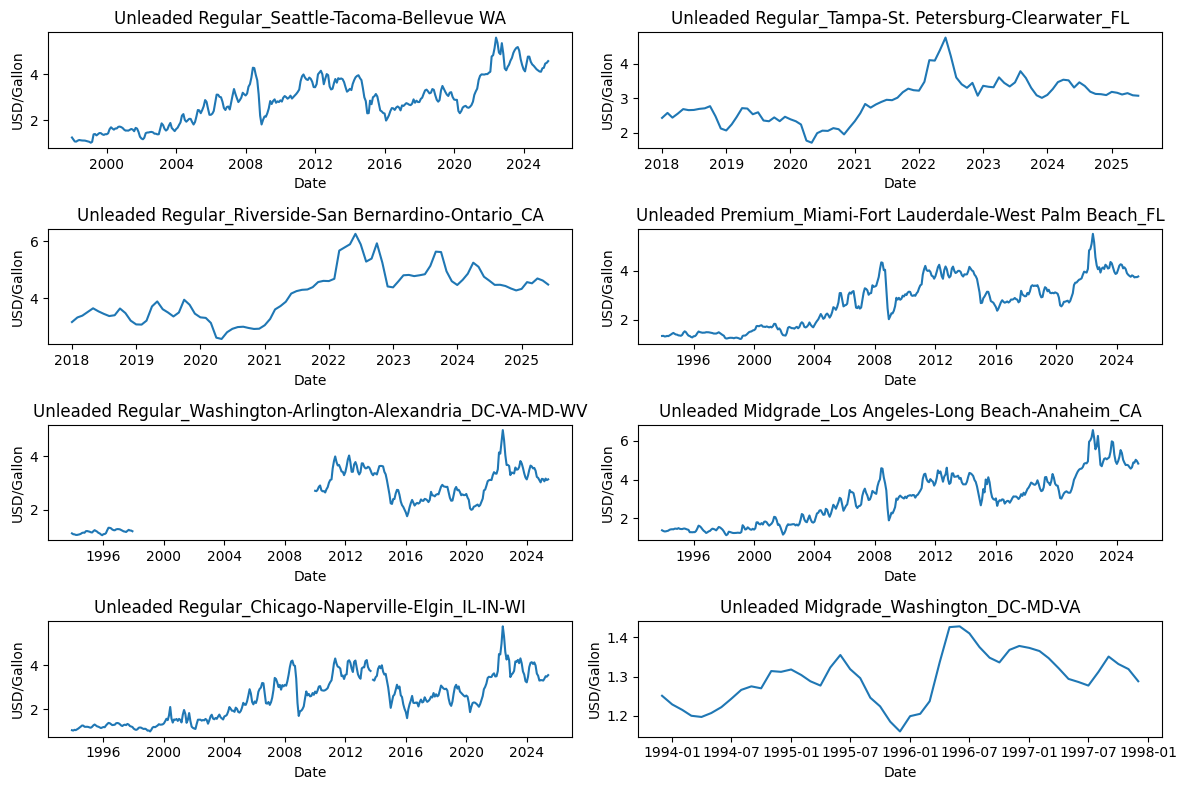

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(4,2, figsize=(12,8))


# Select 8 random columns for plotting
for i,j in enumerate(np.random.randint(92, size=8),1):
    
    df_j = df.iloc[:, j]

    plots = plt.subplot(4,2,i)
    plots.plot(df_j)
    plots.set_ylabel('USD/Gallon')
    plots.set_xlabel('Date')
    plots.set_title(f'{df.columns[j]}')


plt.tight_layout()
plt.show()

A general observation is that all gasoline prices have a similar increasing trend over time, with bouts of increased price volatility throughout US recessions (2008 and 2020). 

More importantly, some series having missing datapoints so perhaps the reporting of certain fuel prices may have been discontinued over time.

Let's use the packaging MissingNo to visualise the extent of missing data in our dataset. 

<Axes: >

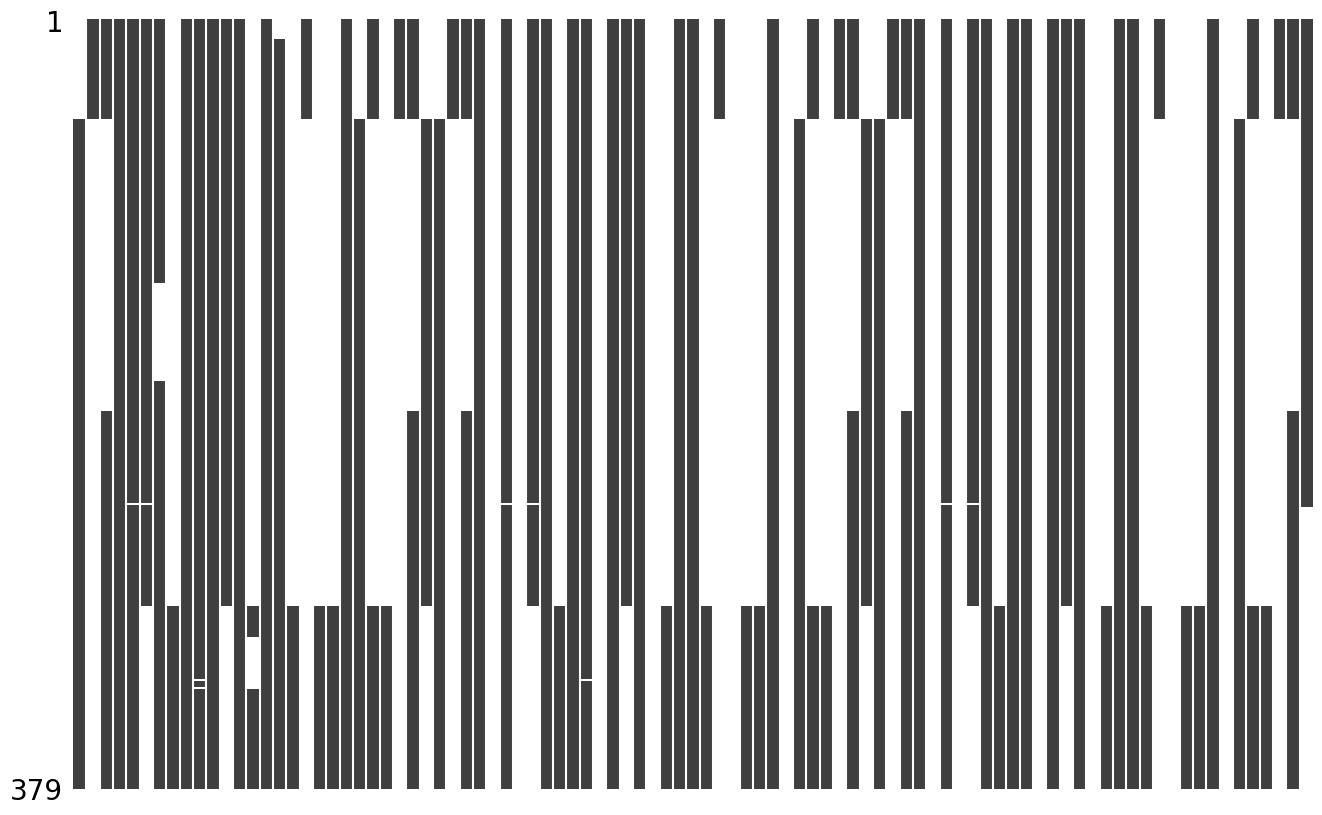

In [6]:
import missingno as msno

fig, ax = plt.subplots(figsize=(16,10))
msno.matrix(df, ax=ax, sparkline=False)

It appears that a large proportion of individual time series have missing datapoints. Let's filter out only the time series data where there's only a few missing values.  

In [33]:
# Filter columns as long as there are more than 370 out of 379 entries
df_notna = df.loc[:, df.notnull().sum() > 370]
df_notna.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 379 entries, 1993-12-01 to 2025-06-01
Data columns (total 28 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   Unleaded Midgrade_Boston-Cambridge-Newton_MA-NH              379 non-null    float64
 1   Unleaded Midgrade_Chicago-Naperville-Elgin_IL-IN-WI          378 non-null    float64
 2   Unleaded Midgrade_Detroit-Warren-Dearborn_MI                 379 non-null    float64
 3   Unleaded Midgrade_Houston-The Woodlands-Sugar Land_TX        377 non-null    float64
 4   Unleaded Midgrade_Los Angeles-Long Beach-Anaheim_CA          379 non-null    float64
 5   Unleaded Midgrade_Miami-Fort Lauderdale-West Palm Beach_FL   379 non-null    float64
 6   Unleaded Midgrade_New York-Newark-Jersey City_NY-NJ-PA       379 non-null    float64
 7   Unleaded Midgrade_San Francisco-Oakland-Hayward_CA           

<Axes: >

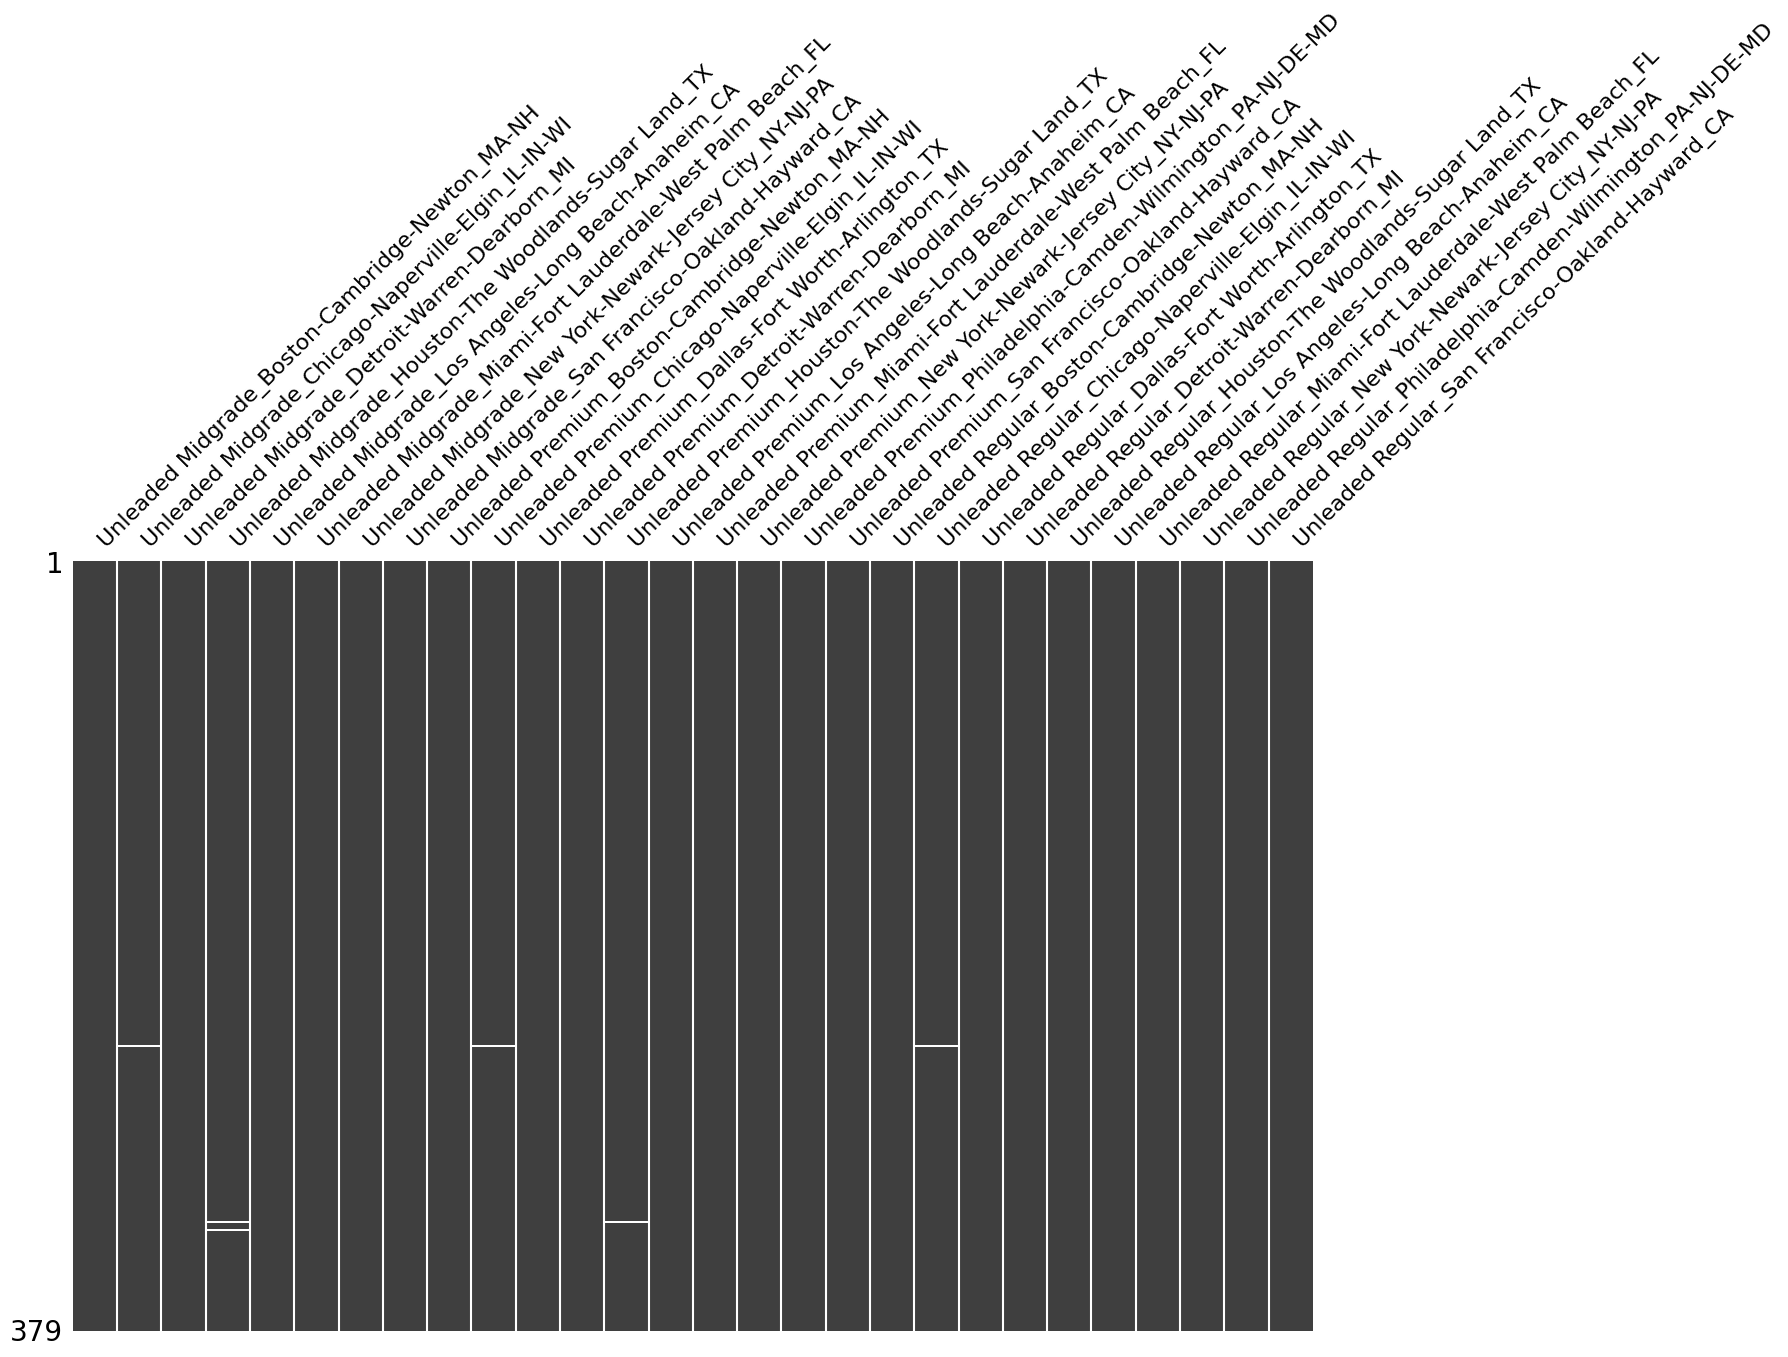

In [8]:
#MissingNo Plot
fig, ax = plt.subplots(figsize=(16,10))
msno.matrix(df_notna, ax=ax, sparkline=False)

<Axes: >

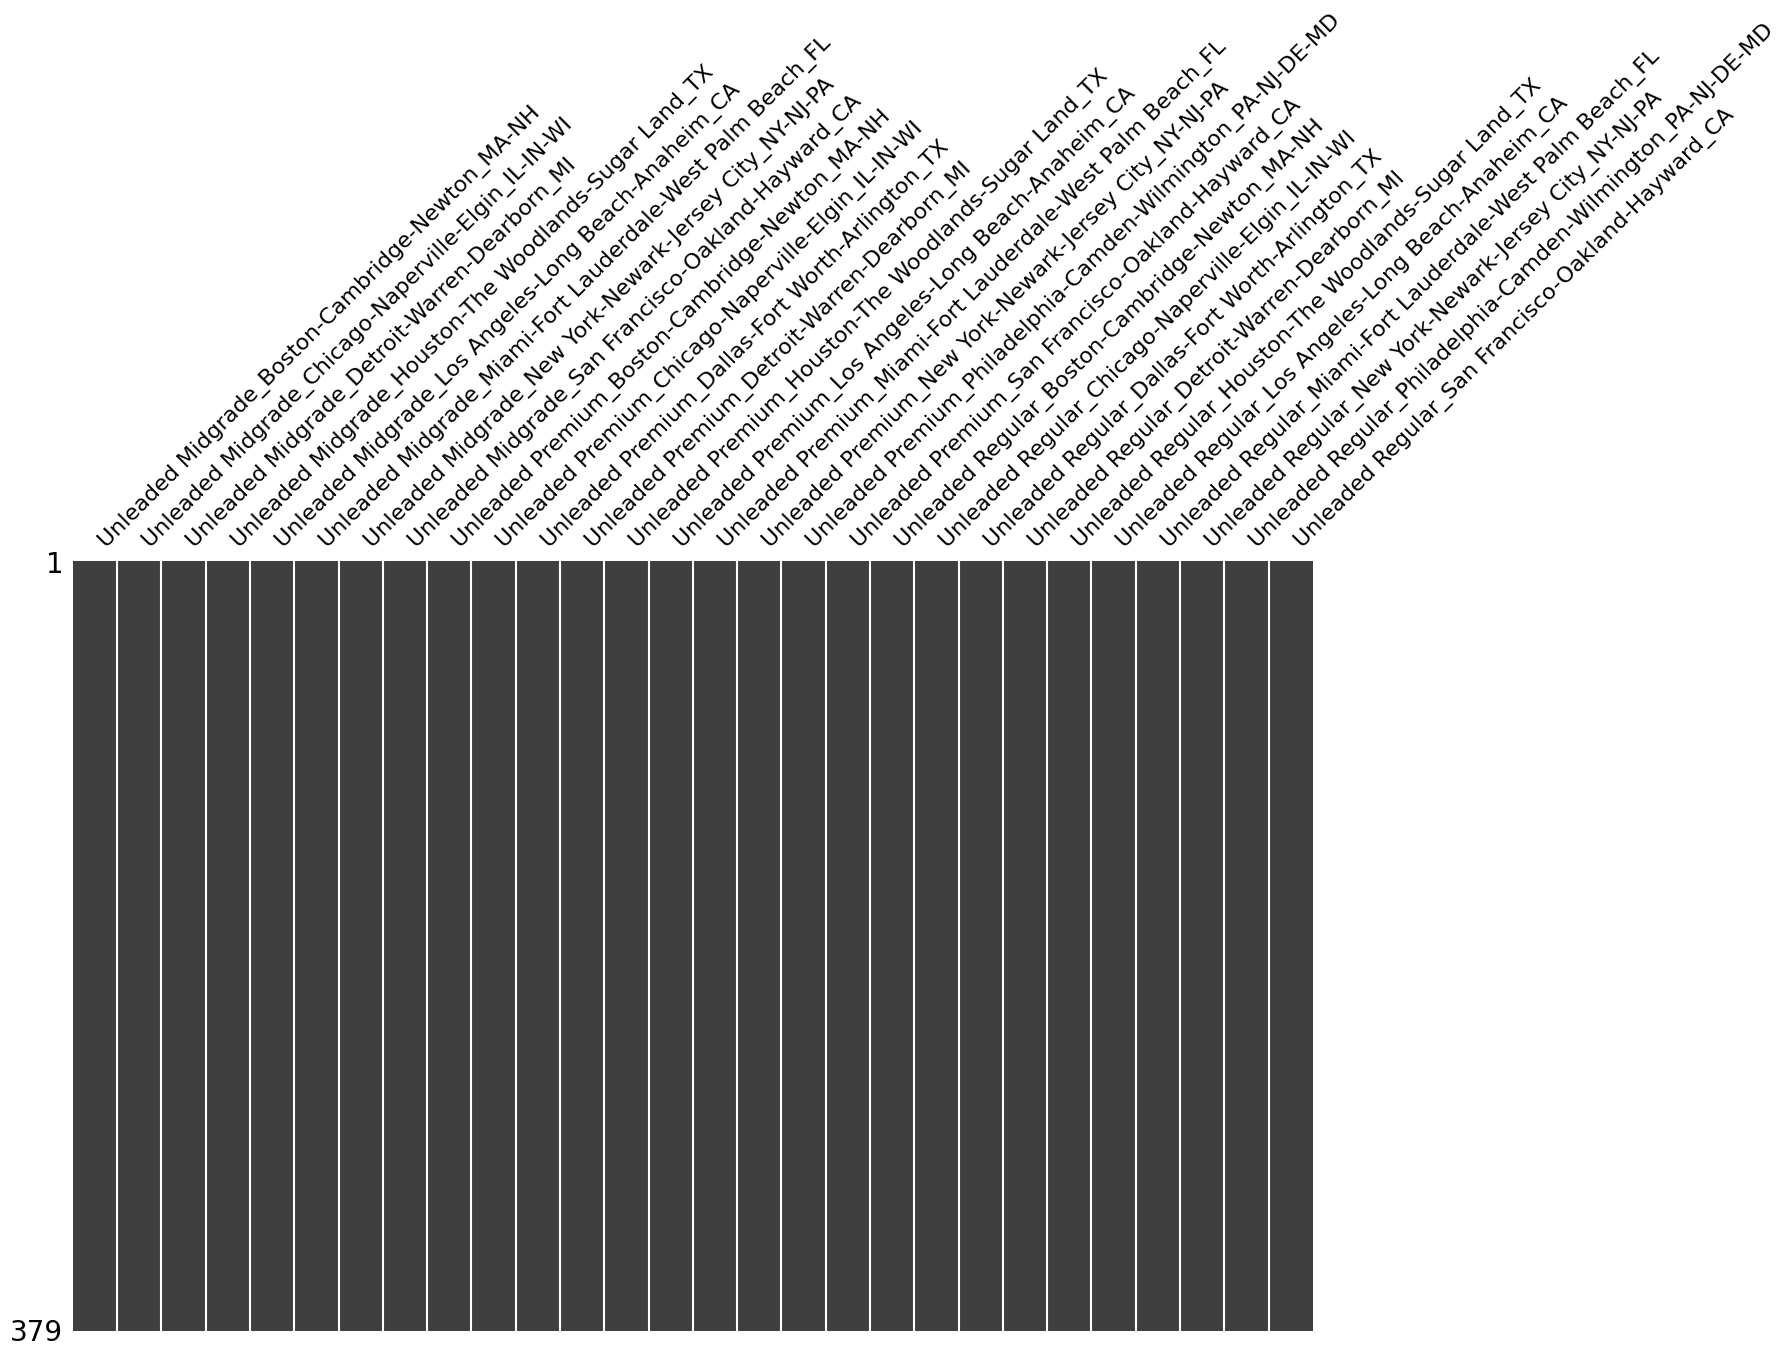

In [9]:
#Backfill any remaining NaN values
df_notna = df_notna.bfill()


#MissingNo Plot
fig, ax = plt.subplots(figsize=(16,10))
msno.matrix(df_notna, ax=ax, sparkline=False)

Now we have a more complete dataset for modelling.

## Model Preparation
Now we split our dataset into a training set and test set. The data in blue is the training data, and the data in purple is the test set.

In [10]:
df_notna.iloc[-20:,:]

,Unleaded Midgrade_Boston-Cambridge-Newton_MA-NH,Unleaded Midgrade_Chicago-Naperville-Elgin_IL-IN-WI,Unleaded Midgrade_Detroit-Warren-Dearborn_MI,Unleaded Midgrade_Houston-The Woodlands-Sugar Land_TX,Unleaded Midgrade_Los Angeles-Long Beach-Anaheim_CA,Unleaded Midgrade_Miami-Fort Lauderdale-West Palm Beach_FL,Unleaded Midgrade_New York-Newark-Jersey City_NY-NJ-PA,Unleaded Midgrade_San Francisco-Oakland-Hayward_CA,Unleaded Premium_Boston-Cambridge-Newton_MA-NH,Unleaded Premium_Chicago-Naperville-Elgin_IL-IN-WI,...,Unleaded Regular_Boston-Cambridge-Newton_MA-NH,Unleaded Regular_Chicago-Naperville-Elgin_IL-IN-WI,Unleaded Regular_Dallas-Fort Worth-Arlington_TX,Unleaded Regular_Detroit-Warren-Dearborn_MI,Unleaded Regular_Houston-The Woodlands-Sugar Land_TX,Unleaded Regular_Los Angeles-Long Beach-Anaheim_CA,Unleaded Regular_Miami-Fort Lauderdale-West Palm Beach_FL,Unleaded Regular_New York-Newark-Jersey City_NY-NJ-PA,Unleaded Regular_Philadelphia-Camden-Wilmington_PA-NJ-DE-MD,Unleaded Regular_San Francisco-Oakland-Hayward_CA
date,,,,,,,,,,,,,,,,,,,,,
2023-11-01,4.033,4.110,3.869,3.252,5.294,3.674,4.099,5.293,4.390,4.588,...,3.487,3.575,2.786,3.310,2.788,5.085,3.222,3.550,3.457,5.088
2023-12-01,3.903,3.824,3.632,3.084,4.951,3.587,3.936,4.928,4.267,4.298,...,3.339,3.278,2.645,3.035,2.605,4.744,3.115,3.375,3.333,4.722
2024-01-01,3.771,3.743,3.503,3.117,4.811,3.615,3.823,4.878,4.131,4.223,...,3.204,3.223,2.756,2.954,2.635,4.599,3.175,3.252,3.231,4.661
2024-02-01,3.757,3.981,3.697,3.267,4.954,3.765,3.838,4.818,4.123,4.461,...,3.204,3.483,2.912,3.180,2.816,4.743,3.338,3.292,3.297,4.602
2024-03-01,3.804,4.398,4.013,3.418,5.167,3.942,3.896,5.211,4.168,4.878,...,3.264,3.910,3.170,3.504,2.984,4.959,3.533,3.370,3.343,4.997
2024-04-01,3.995,4.597,4.101,3.607,5.527,4.011,4.066,5.751,4.346,5.073,...,3.469,4.103,3.355,3.590,3.175,5.321,3.608,3.563,3.562,5.536
2024-05-01,4.114,4.635,4.102,3.570,5.379,3.991,4.203,5.587,4.475,5.108,...,3.596,4.133,3.279,3.583,3.132,5.167,3.578,3.693,3.622,5.370
2024-06-01,4.022,4.570,4.070,3.437,5.027,3.840,4.091,5.218,4.395,5.052,...,3.498,4.053,3.075,3.537,2.988,4.811,3.404,3.570,3.475,4.993
2024-07-01,4.054,4.645,4.129,3.487,4.879,3.883,4.082,5.019,4.414,5.128,...,3.519,4.123,3.182,3.588,3.063,4.665,3.468,3.586,3.527,4.794


In [11]:
train_df = df_notna.iloc[:int(len(df_notna)*0.8),:]
test_df = df_notna.iloc[-int(len(df_notna)*0.2)-1:,:]

display(train_df)
display(test_df)

,Unleaded Midgrade_Boston-Cambridge-Newton_MA-NH,Unleaded Midgrade_Chicago-Naperville-Elgin_IL-IN-WI,Unleaded Midgrade_Detroit-Warren-Dearborn_MI,Unleaded Midgrade_Houston-The Woodlands-Sugar Land_TX,Unleaded Midgrade_Los Angeles-Long Beach-Anaheim_CA,Unleaded Midgrade_Miami-Fort Lauderdale-West Palm Beach_FL,Unleaded Midgrade_New York-Newark-Jersey City_NY-NJ-PA,Unleaded Midgrade_San Francisco-Oakland-Hayward_CA,Unleaded Premium_Boston-Cambridge-Newton_MA-NH,Unleaded Premium_Chicago-Naperville-Elgin_IL-IN-WI,...,Unleaded Regular_Boston-Cambridge-Newton_MA-NH,Unleaded Regular_Chicago-Naperville-Elgin_IL-IN-WI,Unleaded Regular_Dallas-Fort Worth-Arlington_TX,Unleaded Regular_Detroit-Warren-Dearborn_MI,Unleaded Regular_Houston-The Woodlands-Sugar Land_TX,Unleaded Regular_Los Angeles-Long Beach-Anaheim_CA,Unleaded Regular_Miami-Fort Lauderdale-West Palm Beach_FL,Unleaded Regular_New York-Newark-Jersey City_NY-NJ-PA,Unleaded Regular_Philadelphia-Camden-Wilmington_PA-NJ-DE-MD,Unleaded Regular_San Francisco-Oakland-Hayward_CA
date,,,,,,,,,,,,,,,,,,,,,
1993-12-01,1.269,1.176,1.051,1.137,1.383,1.276,1.289,1.302,1.331,1.251,...,1.078,1.063,1.032,0.948,0.989,1.164,1.143,1.139,1.052,1.165
1994-01-01,1.253,1.158,1.053,1.111,1.345,1.279,1.254,1.281,1.304,1.240,...,1.052,1.047,0.998,0.944,0.962,1.131,1.145,1.108,1.027,1.140
1994-02-01,1.138,1.196,1.084,1.111,1.323,1.262,1.229,1.284,1.232,1.270,...,1.015,1.081,0.987,0.985,0.964,1.135,1.135,1.088,1.025,1.136
1994-03-01,1.138,1.179,1.059,1.103,1.328,1.259,1.226,1.285,1.236,1.257,...,1.011,1.065,0.985,0.957,0.958,1.147,1.131,1.081,1.023,1.152
1994-04-01,1.143,1.215,1.118,1.137,1.348,1.283,1.220,1.308,1.242,1.299,...,1.016,1.101,1.007,1.008,0.993,1.168,1.138,1.077,1.000,1.165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-10-01,3.080,3.183,3.199,2.877,3.966,3.179,3.253,4.048,3.248,3.571,...,2.816,2.850,2.575,2.840,2.538,3.806,2.824,2.919,2.865,3.870
2018-11-01,3.028,2.819,3.008,2.708,3.768,3.047,3.141,3.984,3.175,3.207,...,2.743,2.487,2.222,2.608,2.324,3.602,2.608,2.789,2.598,3.788
2018-12-01,2.889,2.582,2.624,2.394,3.538,2.806,2.968,3.854,3.049,2.954,...,2.603,2.257,1.915,2.242,1.989,3.373,2.390,2.597,2.449,3.632


,Unleaded Midgrade_Boston-Cambridge-Newton_MA-NH,Unleaded Midgrade_Chicago-Naperville-Elgin_IL-IN-WI,Unleaded Midgrade_Detroit-Warren-Dearborn_MI,Unleaded Midgrade_Houston-The Woodlands-Sugar Land_TX,Unleaded Midgrade_Los Angeles-Long Beach-Anaheim_CA,Unleaded Midgrade_Miami-Fort Lauderdale-West Palm Beach_FL,Unleaded Midgrade_New York-Newark-Jersey City_NY-NJ-PA,Unleaded Midgrade_San Francisco-Oakland-Hayward_CA,Unleaded Premium_Boston-Cambridge-Newton_MA-NH,Unleaded Premium_Chicago-Naperville-Elgin_IL-IN-WI,...,Unleaded Regular_Boston-Cambridge-Newton_MA-NH,Unleaded Regular_Chicago-Naperville-Elgin_IL-IN-WI,Unleaded Regular_Dallas-Fort Worth-Arlington_TX,Unleaded Regular_Detroit-Warren-Dearborn_MI,Unleaded Regular_Houston-The Woodlands-Sugar Land_TX,Unleaded Regular_Los Angeles-Long Beach-Anaheim_CA,Unleaded Regular_Miami-Fort Lauderdale-West Palm Beach_FL,Unleaded Regular_New York-Newark-Jersey City_NY-NJ-PA,Unleaded Regular_Philadelphia-Camden-Wilmington_PA-NJ-DE-MD,Unleaded Regular_San Francisco-Oakland-Hayward_CA
date,,,,,,,,,,,,,,,,,,,,,
2019-03-01,2.754,3.039,2.874,2.521,3.602,2.935,2.913,3.711,2.941,3.429,...,2.473,2.707,2.287,2.527,2.205,3.431,2.557,2.572,2.584,3.563
2019-04-01,2.900,3.358,3.132,2.804,4.122,3.118,3.081,4.132,3.079,3.742,...,2.645,3.011,2.558,2.782,2.494,3.947,2.767,2.787,2.815,3.958
2019-05-01,3.045,3.441,3.154,2.867,4.136,3.082,3.252,4.239,3.220,3.833,...,2.804,3.112,2.558,2.800,2.538,3.973,2.745,2.945,2.902,4.003
2019-06-01,2.961,3.287,3.056,2.711,3.883,2.961,3.177,4.001,3.135,3.673,...,2.679,2.939,2.353,2.695,2.370,3.700,2.560,2.858,2.766,3.775
2019-07-01,2.964,3.382,3.221,2.791,3.832,3.032,3.164,3.893,3.132,3.776,...,2.676,3.039,2.503,2.868,2.429,3.647,2.649,2.848,2.797,3.659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-02-01,3.603,3.876,3.664,3.093,4.884,3.546,3.639,5.078,3.972,4.368,...,3.045,3.302,2.741,3.105,2.646,4.671,3.119,3.111,3.120,4.848
2025-03-01,3.556,3.950,3.624,3.120,4.876,3.487,3.586,5.030,3.918,4.444,...,2.984,3.382,2.763,3.044,2.653,4.666,3.048,3.054,3.051,4.803
2025-04-01,3.524,4.061,3.677,3.217,5.026,3.511,3.575,5.206,3.885,4.559,...,2.954,3.499,2.846,3.125,2.725,4.817,3.068,3.059,3.105,4.985


## Modelling
### Trial #1: US East Coast
Let's first predict a gasoline fuel price series based in the USEC. 

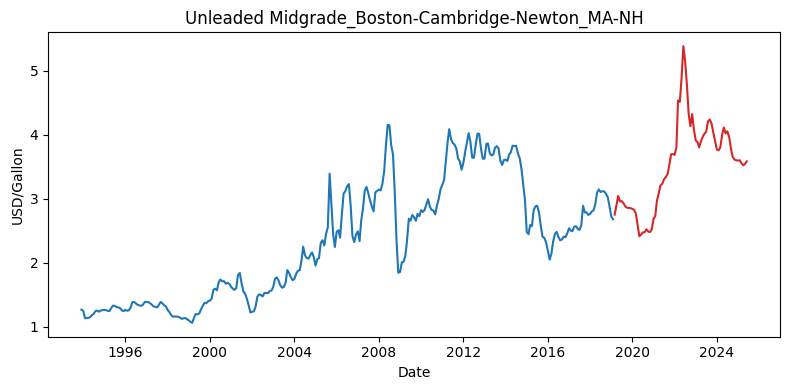

In [12]:
nrows, ncols = 1, 1
fig, ax = plt.subplots(nrows, ncols, figsize=(8,4))

ax1 = plt.subplot(nrows, ncols, 1)
ax1.plot(train_df.iloc[:,0], c='tab:blue')
ax1.plot(test_df.iloc[:,0], c='tab:red')
ax1.set_ylabel('USD/Gallon')
ax1.set_xlabel('Date')
ax1.set_title(f'{train_df.columns[0]}')

plt.tight_layout()
plt.show()

In [13]:
import lightgbm as lgb

x_train = train_df.iloc[:,1:]
y_train = train_df.iloc[:,0]

x_test = test_df.iloc[:,1:]
y_test = test_df.iloc[:,0]

model = lgb.LGBMRegressor()
model.fit(x_train,y_train)

predictions = model.predict(x_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000251 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2754
[LightGBM] [Info] Number of data points in the train set: 303, number of used features: 27
[LightGBM] [Info] Start training from score 2.319604
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

MAE: 0.1661728619106265
RMSE: 0.31035228845104224


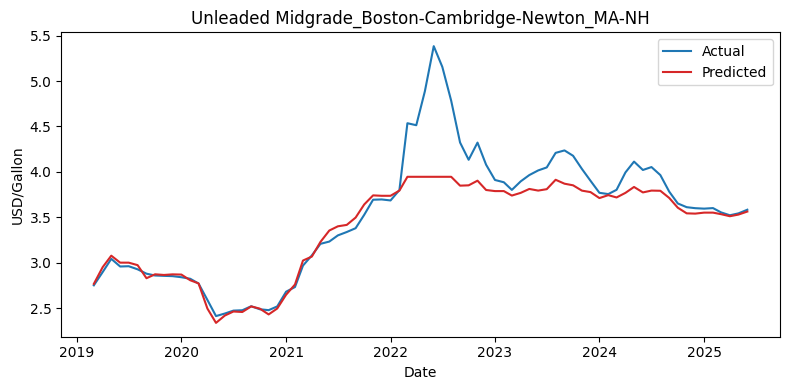

In [15]:
fig, ax = plt.subplots(nrows, ncols, figsize=(8,4))

ax1 = plt.subplot(nrows, ncols, 1)
ax1.plot(y_test.index, y_test, c='tab:blue', label='Actual')
ax1.plot(y_test.index, predictions, c='tab:red', label='Predicted')
ax1.set_ylabel('USD/Gallon')
ax1.set_xlabel('Date')
ax1.set_title(f'{train_df.columns[0]}')

plt.legend()
plt.tight_layout()
plt.show()

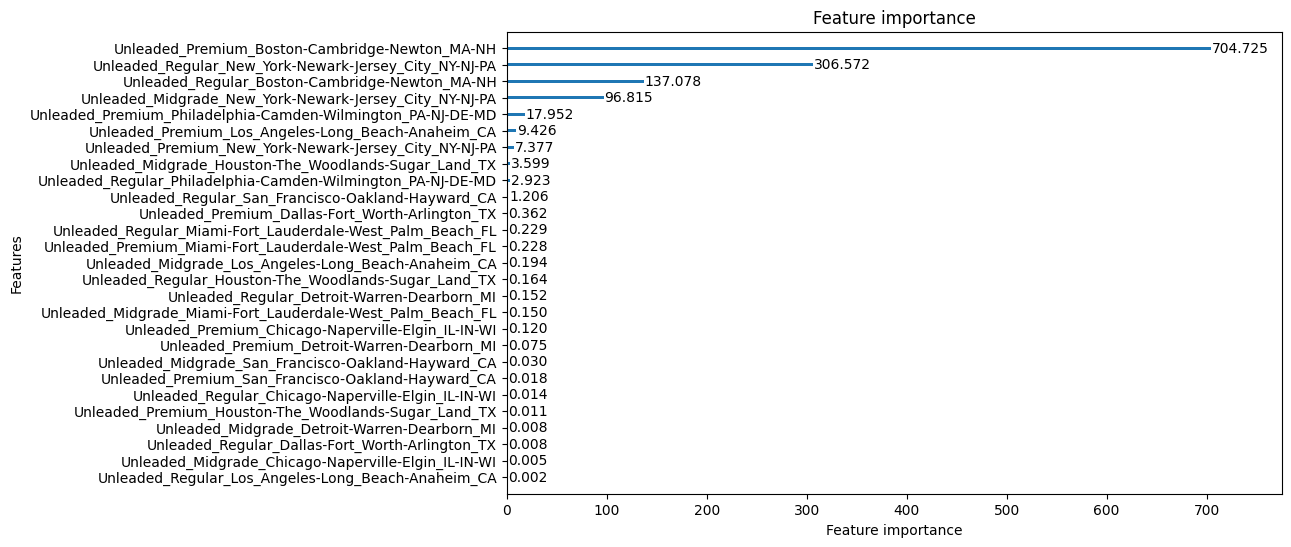

In [16]:
lgb.plot_importance(model, importance_type='gain', figsize=(10,6))
plt.grid(False)
plt.show()

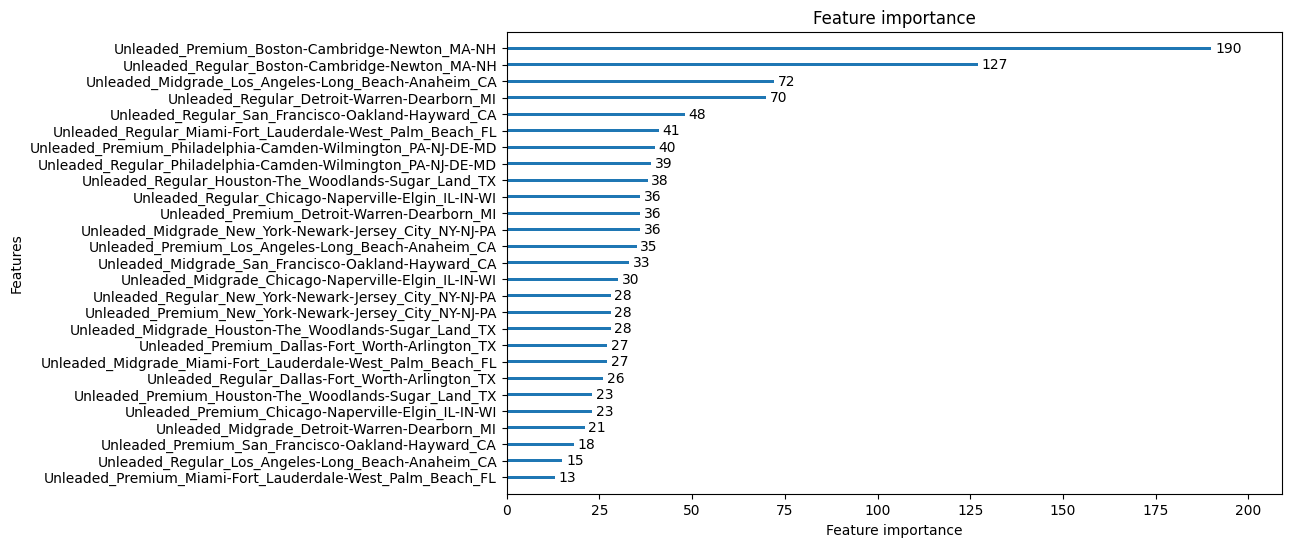

In [17]:
lgb.plot_importance(model, importance_type='split', figsize=(10,6))
plt.grid(False)
plt.show()

### Trial 2: US Gulf Coast

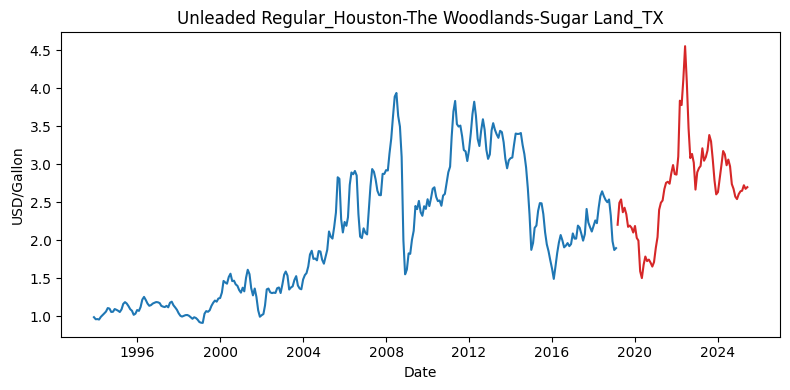

In [18]:
nrows, ncols = 1, 1
fig, ax = plt.subplots(nrows, ncols, figsize=(8,4))

ax1 = plt.subplot(nrows, ncols, 1)
ax1.plot(train_df.iloc[:,-6], c='tab:blue')
ax1.plot(test_df.iloc[:,-6], c='tab:red')
ax1.set_ylabel('USD/Gallon')
ax1.set_xlabel('Date')
ax1.set_title(f'{train_df.columns[-6]}')

plt.tight_layout()
plt.show()

In [19]:
x_train = train_df.iloc[:, train_df.columns != train_df.columns[-6]]
y_train = train_df.iloc[:,-6]

x_test = test_df.iloc[:, test_df.columns != test_df.columns[-6]]
y_test = test_df.iloc[:,-6]

model = lgb.LGBMRegressor()
model.fit(x_train,y_train)

predictions = model.predict(x_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000117 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2754
[LightGBM] [Info] Number of data points in the train set: 303, number of used features: 27
[LightGBM] [Info] Start training from score 2.018759
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

In [20]:
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

MAE: 0.20349567260553592
RMSE: 0.24722379464667396


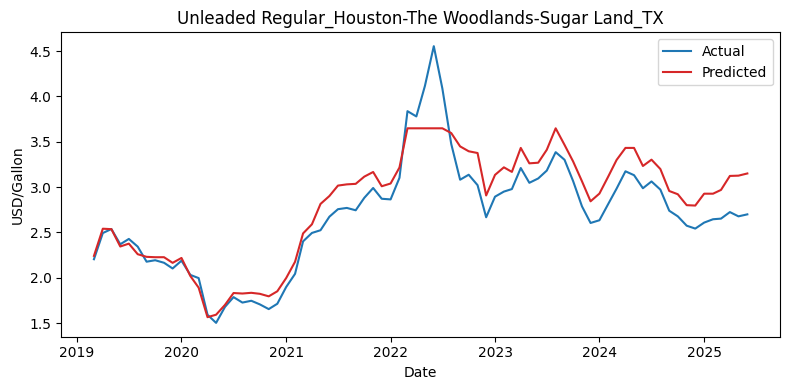

In [21]:
fig, ax = plt.subplots(nrows, ncols, figsize=(8,4))

ax1 = plt.subplot(nrows, ncols, 1)
ax1.plot(y_test.index, y_test, c='tab:blue', label='Actual')
ax1.plot(y_test.index, predictions, c='tab:red', label='Predicted')
ax1.set_ylabel('USD/Gallon')
ax1.set_xlabel('Date')
ax1.set_title(f'{train_df.columns[-6]}')

plt.legend()
plt.tight_layout()
plt.show()

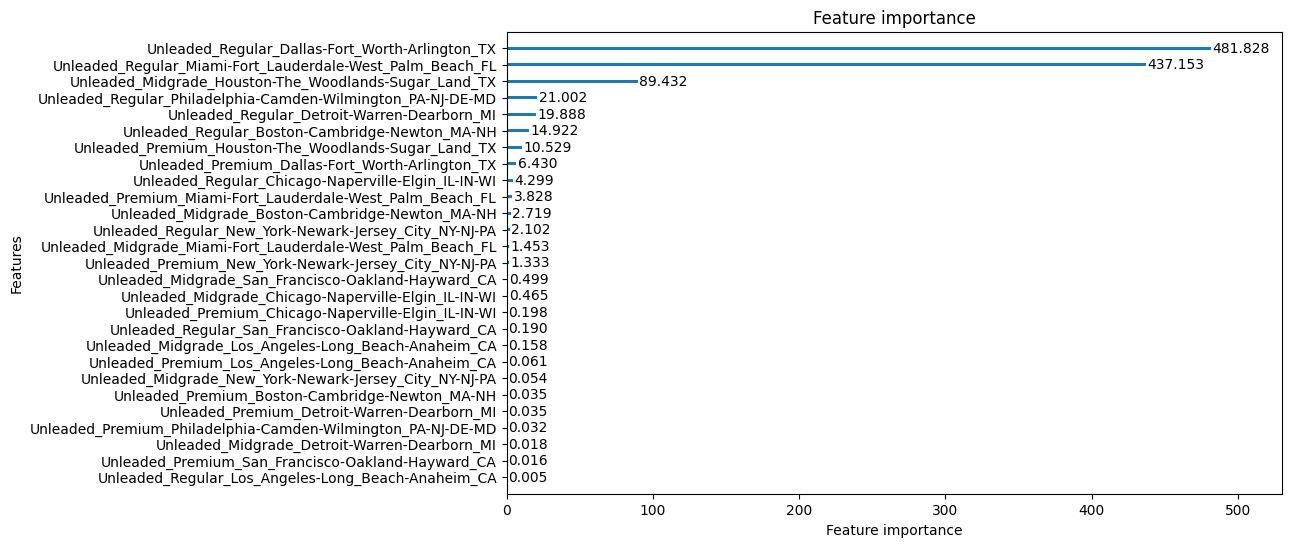

In [22]:
lgb.plot_importance(model, importance_type='gain', figsize=(10,6))
plt.grid(False)
plt.show()

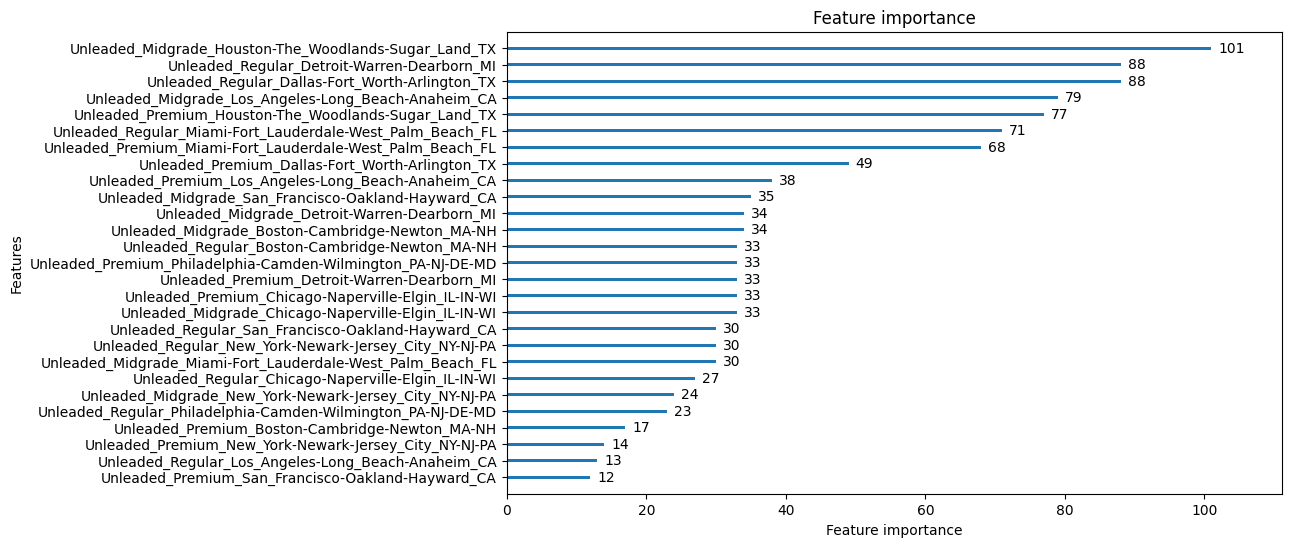

In [23]:
lgb.plot_importance(model, importance_type='split', figsize=(10,6))
plt.grid(False)
plt.show()